In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import collections
import re
import config
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import Image as im

In [3]:
#Connect to Twitter
twitter = Twython(config.api_key, config.api_secret) 

In [4]:
##Make gitignore file by create text file and rename .gitignore then git add .gitignore

In [5]:
user_timeline=twitter.get_user_timeline(screen_name='realDonaldTrump',count=1) #screen_name is twitter handle

In [6]:
last_id = user_timeline[0]['id']-1
for i in range(16):
    batch = twitter.get_user_timeline(screen_name='realDonaldTrump',count=1600, max_id=last_id)
    user_timeline.extend(batch)
    last_id = user_timeline[-1]['id'] - 1

In [54]:
#Extract textfields from tweets
raw_tweets = []
for tweets in user_timeline:
    if tweets['retweeted'] == False:
        raw_tweets.append(tweets['text'])

In [55]:
raw_tweets

['RT @TeamTrump: New @CNBC poll in key electoral states....\n\n5,408 likely voters: AZ, FL, MI, NC, PA, WI.\n\n@realDonaldTrump leads @JoeBiden 4…',
 '....On Monday, the flags will be at half-staff in honor of the men and women in our Military who have made the Ulti… https://t.co/nUqHjuqYKH',
 'I will be lowering the flags on all Federal Buildings and National Monuments to half-staff over the next three days… https://t.co/D2PAXlVvT4',
 'Another $298M heading to @MTA, adding up to over $2B in federal funding from @USDOT so far, part of the $3.9B total… https://t.co/yAqECQdUud',
 'https://t.co/maLSpL5zuK',
 'https://t.co/pAC6D3uhDA',
 'RT @WhiteHouse: We send our love to all those affected by the flooding near Midland. https://t.co/bjSfv0gSOD',
 "RT @WhiteHouse: President @realDonaldTrump is at @Ford's Rawsonville Plant!\n\nAmerica's workers make our Nation proud! 🇺🇸 https://t.co/XrOLd…",
 'RT @WhiteHouse: LIVE: POTUS Delivers Remarks at Ford Rawsonville Components Plant https://t.co/n9l

In [20]:
raw_string = ''.join(raw_tweets)

In [64]:
at = [ t for t in raw_string.split() if t.startswith('@') ]
at

['@TeamTrump:',
 '@CNBC',
 '@realDonaldTrump',
 '@JoeBiden',
 '@MTA,',
 '@USDOT',
 '@WhiteHouse:',
 '@WhiteHouse:',
 '@realDonaldTrump',
 "@Ford's",
 '@WhiteHouse:',
 '@BreitbartNews....Hahn,',
 '@FoxNews',
 '@WhiteHouse',
 '@realDonaldTrump:',
 '@WhiteHouse:',
 '@realDonaldTrump',
 '@TeamTrump:',
 '@KayleighMcEnany:',
 '@realDonaldTrump’s',
 '@charliekirk11:',
 '@charliekirk11:',
 '@JackPosobiec:',
 '@USDOT',
 '@FEMA',
 '@FoxBusiness.',
 '@JonathanTurley:',
 '@WSJ:',
 '@WSJopinion:',
 '@marc_lotter:',
 '@MarshaBlackburn:',
 '@KatiePavlich:',
 '@KimStrassel:',
 '@AriFleischer:',
 '@AlanDersh:',
 '@AlanDersh:',
 '@AndrewCMcCarthy:',
 '@NRO',
 '@AndrewCMcCarthy:',
 '@dbongino:',
 '@SaraCarterDC:',
 '@seanmdav:',
 '@thebradfordfile:',
 '@realDonaldTrump',
 '@stoolpresidente:',
 '@myfoxboston',
 '@danraemc:',
 '@Jim_Jordan:',
 '@realDonaldTrump:',
 '@realDonaldTrump:',
 '@Jim_Jordan:',
 '@realDonaldTrump:',
 '@realDonaldTrump:',
 '@realDonaldTrump:',
 '@Jim_Jordan:',
 '@WhiteHouse:',
 '@re

In [67]:
# Top 20 @accounts Tweets and RTs from the president
mentions = [a for a in at]
counted_mentions = collections.Counter(mentions)

mentions_list = []
counts = []
for at, count in counted_mentions.most_common(20):
    mentions_list.append(at)
    counts.append(count)

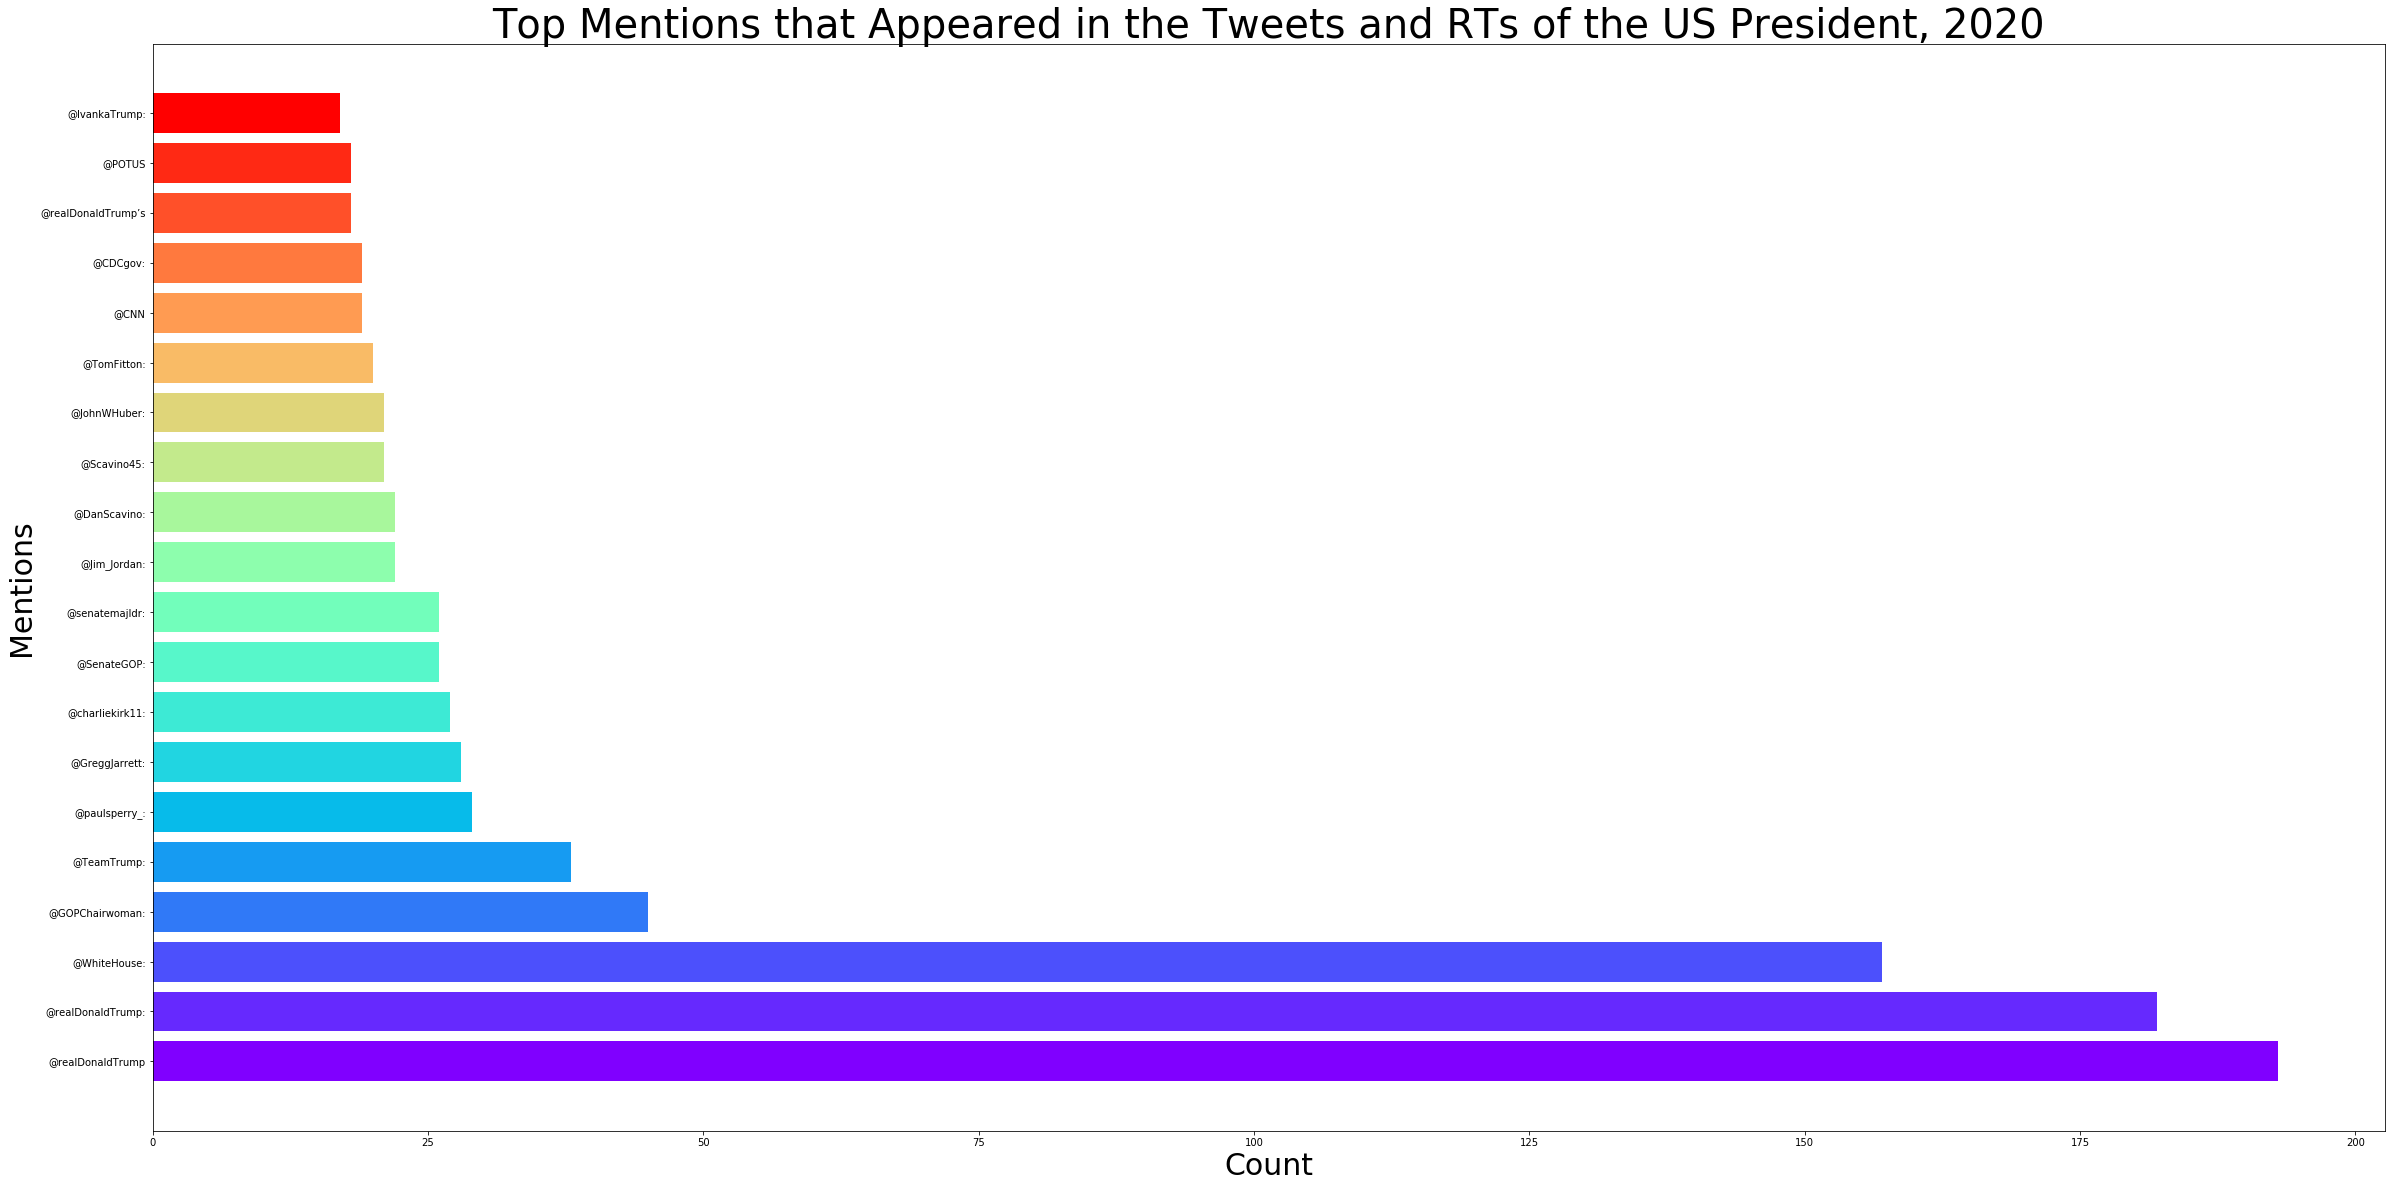

In [70]:
colors = cm.rainbow(np.linspace(0, 1, 20))


plt.figure(figsize=(40,20))
plt.title('Top Mentions that Appeared in the Tweets and RTs of the US President, 2020', fontsize = 40)
plt.xlabel('Count', size = 30)
plt.ylabel('Mentions', size = 30)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.barh(mentions_list, counts, color=colors)

plt.savefig("Visualizations/Top_Mentions_Tweets")
plt.show()

In [87]:
hashtag = [h for h in raw_string.split() if h.startswith("#")]
hashtag

['#coronavirus',
 '#OANN',
 '#MAGA',
 '#MAGA',
 '#MAGA',
 '#MichaelFlynn:',
 '#Hill…RT',
 '#BeijingBiden',
 '#Coronavirus:',
 '#MAGA',
 '#OBAMAGATEThank',
 '#ca25RT',
 '#BREAKING',
 '#COVID19',
 '#MAGA',
 '#MeToo',
 '#GoodNewsOfTheDay',
 '#ChuckTodd',
 '#MeetThePress.',
 '#GOTV',
 '#Moms…RT',
 '#Oba…RT',
 '#BeBest.',
 '#ObamaGate',
 '#coronavirus',
 '#coronavirus.',
 '#BillyGrahamRT',
 '#VEDay75,',
 '#BeBest',
 '#BeBest,',
 '#NationalTeacherDay,',
 '#CincoDeMayo!',
 '#COVI…RT',
 '#PaycheckProtectionProgram',
 '#LeadRigh…RT',
 '#USNSComfort!',
 '#TrumpIsNotADoctor',
 '#NextRevFNC!',
 '#NextRevFNC!',
 '#American',
 '#COVID19',
 '#AmericaStrong',
 '#COVID',
 '#InThisTogether',
 '#NY21',
 '#FLYNN',
 '#IowaStrong',
 '#SlowWalker',
 '#TeamTrump',
 '#PaycheckProtectionProgram',
 '#COVID19.',
 '#AmericaStrong',
 '#HumanScum',
 '#GodBlessAmerica🇺🇸',
 '#PresidentTrump',
 '#ElectionDay',
 '#TeamTrump',
 '#COVID19',
 '#COVID19',
 '#COVID19',
 '#COVID19.',
 '#CDC',
 '#COVID19',
 '#COVID19',
 '#COVI

In [90]:
#Will include official tweets from the president as well as retweets from the president
hashtags = [h for h in hashtag]
counted_hashtags = collections.Counter(hashtags)

hashtags_list = []
hashtags_counts = []
for ha, count in counted_hastags.most_common(20):
    hashtags_list.append(ha)
    hashtags_counts.append(count)

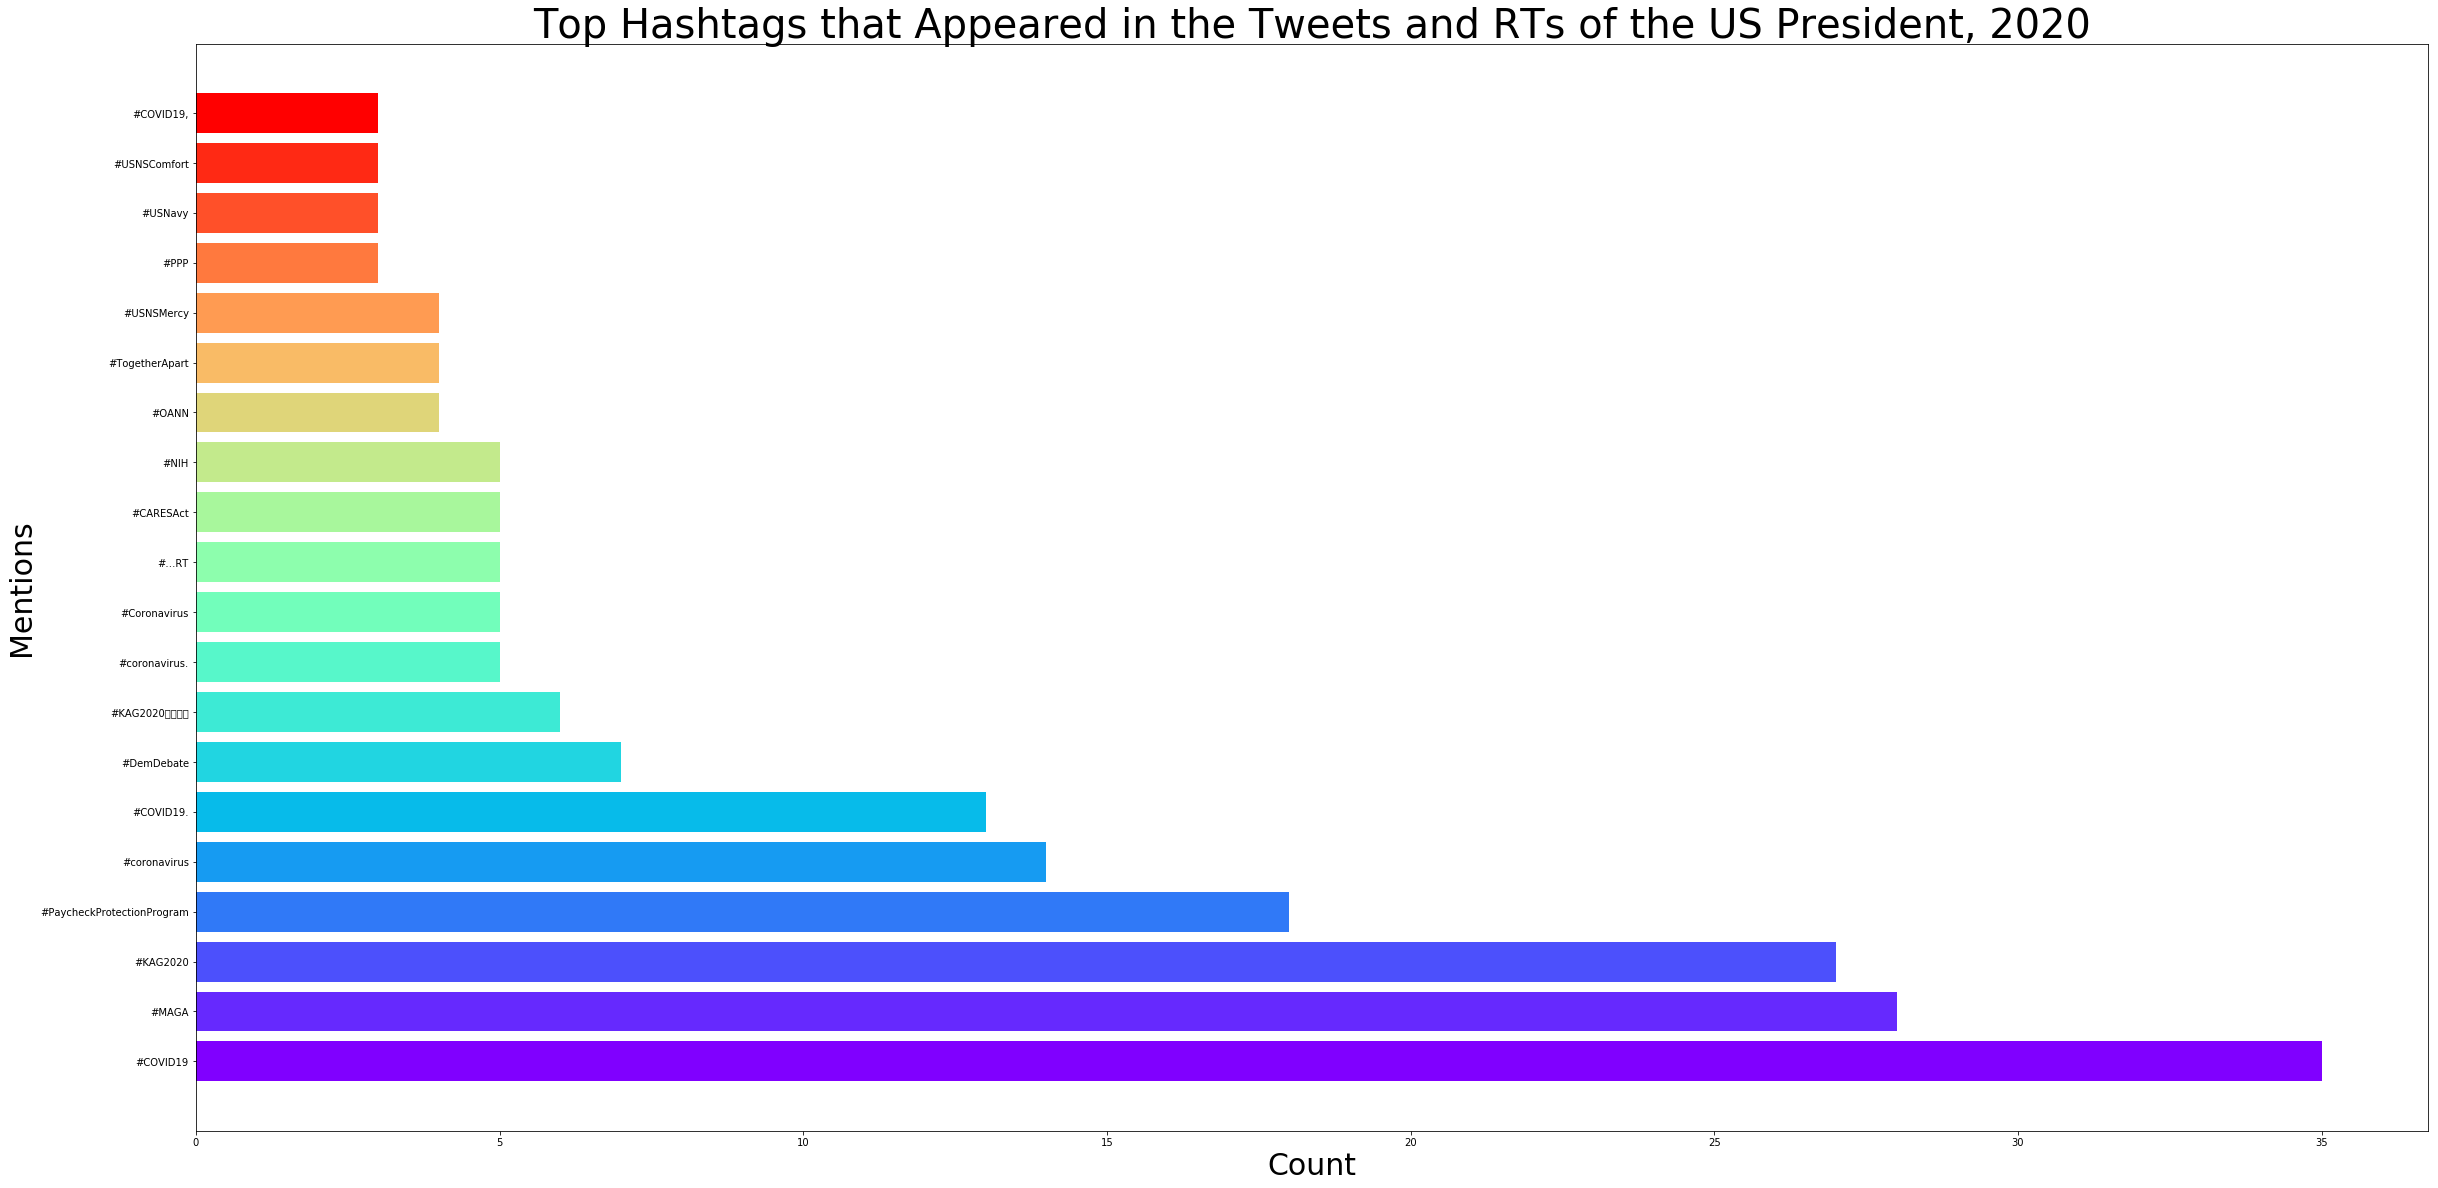

In [92]:
colors = cm.rainbow(np.linspace(0, 1, 20))


plt.figure(figsize=(40,20))
plt.title('Top Hashtags that Appeared in the Tweets and RTs of the US President, 2020', fontsize = 40)
plt.xlabel('Count', size = 30)
plt.ylabel('Mentions', size = 30)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.barh(hashtags_list, hashtags_counts, color=colors)

plt.savefig("Visualizations/Most_Common_Hastags_realTrump")
plt.show()